In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

dataPath = (os.getcwd().replace("\\", "/")) + "/자료/"
nonSharedDataPath = os.getcwd().replace("\\", "/") + "/../공유못함/"

# 자료부르기 예제
# df = pd.read_csv(dataPath + 'seoul_nav.csv', sep=',', encoding='utf8')
# df = pd.read_csv(nonSharedDataPath + '행정동별대중교통수단통합.csv', sep=',', encoding='euc-kr')

In [ ]:
#이규민

In [28]:
pTDF = pd.read_csv(nonSharedDataPath + '행정동별대중교통수단통합.csv', sep=',', encoding='euc-kr')
mappingDF = pd.read_excel(dataPath + '행정동코드_매핑정보_2018.xlsx')
mappingDF = mappingDF[:][1:]

In [30]:
mappingDF.info()
pTDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 1 to 435
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   통계청행정동코드  435 non-null    object
 1   행자부행정동코드  435 non-null    object
 2   시도명       435 non-null    object
 3   시군구명      435 non-null    object
 4   행정동명      435 non-null    object
dtypes: object(5)
memory usage: 17.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29993501 entries, 0 to 29993500
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   기준_날짜      float64
 1   시작_행정동_ID  float64
 2   종료_행정동_ID  float64
 3   승객수        float64
dtypes: float64(4)
memory usage: 915.3 MB


In [36]:
mappingDF[mappingDF.columns[0]] = mappingDF[mappingDF.columns[0]].astype('float')
mappingDF[mappingDF.columns[1]] = mappingDF[mappingDF.columns[1]].astype('float')

In [37]:
mappingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 1 to 435
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   통계청행정동코드  435 non-null    float64
 1   행자부행정동코드  435 non-null    float64
 2   시도명       435 non-null    object 
 3   시군구명      435 non-null    object 
 4   행정동명      435 non-null    object 
dtypes: float64(2), object(3)
memory usage: 17.1+ KB


In [57]:
c1 = (pTDF['기준_날짜'] == 0)
c2 = (pTDF['시작_행정동_ID'] == 0)
c3 = (pTDF['종료_행정동_ID'] == 0)
(c1 | c2 | c3).unique()
pTDF = pTDF[(c1 | c2 | c3) == False]

In [59]:
for i in pTDF.columns[:3]:
    pTDF[i] = pTDF[i].astype('str')
pTDF.info()

C:\Users\bigdata\AppData\Local\Temp\ipykernel_4940\2665572616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pTDF[i] = pTDF[i].astype('str')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27560766 entries, 0 to 29993500
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   기준_날짜      object 
 1   시작_행정동_ID  object 
 2   종료_행정동_ID  object 
 3   승객수        float64
dtypes: float64(1), object(3)
memory usage: 1.0+ GB


In [60]:
shGroup = pTDF.groupby(pTDF.columns[1:3].to_list()).agg('sum').sort_values('승객수', ascending=False)
shGroup = shGroup.head(30)
shGroup

,,승객수
시작_행정동_ID,종료_행정동_ID,
1114066.0,1114066.0,674595.0
1122066.0,1122066.0,466632.0
1112071.0,1112071.0,443971.0
1121073.0,1121058.0,427847.0
1101061.0,1101061.0,406154.0
1119054.0,1119054.0,387317.0
1122052.0,1124077.0,375931.0
1124077.0,1122052.0,353893.0
1123064.0,1123064.0,329071.0


Text(0.5, 0, '시작행정동 - 종료행정동')

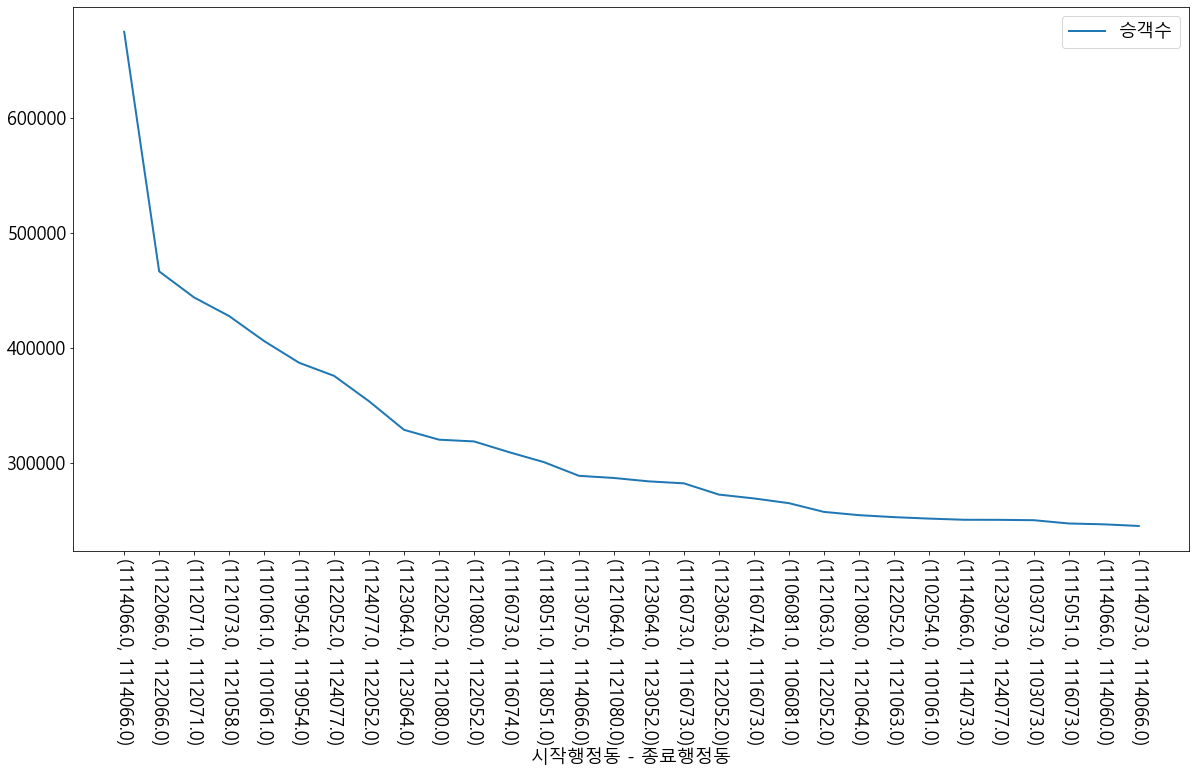

In [62]:
plt.rc('font', family='Malgun Gothic', size = 18)
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['lines.linewidth'] = 2

shGroup.plot(xticks=[i for i in range(30)])
plt.xticks(rotation=270)
plt.xlabel('시작행정동 - 종료행정동')

In [69]:
carMovingDF = pd.read_csv(dataPath + '통행량_동매핑.csv', sep=',', encoding='euc-kr')
carMovingDF = carMovingDF[carMovingDF.columns[1:]]
carMovingDF

,행자부행정동코드,행정동명,지점번호,지점명칭,검지기 유형,위도,경도,주소,도로명 주소,유입 방향,유출방향
0,11110530,사직동,A-14,새문안로(서울역사박물관),지자기,37.569776,126.971354,서울시 종로구 신문로2가 1-2,0,[새문안로]서울역사박물관->광화문역,[새문안로]광화문역->서울역사박물관
1,11110560,평창동,D-02,평창문화로(북악터널),지자기,37.611547,126.979308,서울시 종로구 평창동 2-15,0,[평창문화로]국민대학교앞->신영동삼거리,[평창문화로]신영동삼거리->국민대학교앞
2,11110615,종로3가동,A-15,종로(종로3가역),지자기,37.570216,126.990832,서울시 종로구 종로3가 137-3,서울시 종로구 종로 116-4,[종로]종로3가->종로2가,[종로]종로2가->종로3가
3,11110650,혜화동,A-06,창경궁로(서울여자대학교),지자기,37.582526,126.998011,서울시 종로구 명륜4가 197-5,0,[창경궁로]성균관대입구->원남동사거리,[창경궁로]원남동사거리->성균관대입구
4,11140540,회현동,A-13,세종대로(서울역),지자기,37.558061,126.973439,서울시 중구 남대문로5가 84-15,서울시 중구 세종대로 16-2,[세종대로]서울역->숭례문,[세종대로]숭례문->서울역
5,11140540,회현동,A-19,칠패로(숭례문),지자기,37.559593,126.972518,서울시 중구 봉래동1가 47-2,0,[칠패로]염천교->숭례문,[칠패로]숭례문->염천교
6,11140540,회현동,A-24,소파로(숭의여자대학교),루프,37.554896,126.983521,서울시 중구 회현동1가 산1-16,서울시 중구 소파로 57,[소파로]백범광장->숭의여대,[소파로]숭의여대->백범광장
7,11140550,명동,A-17,세종대로(시청역2),지자기,37.567496,126.977208,서울시 중구 태평로1가 61-29,0,[세종대로]서울시의회->덕수궁,[세종대로]덕수궁->서울시의회
8,11140580,장충동,A-10,동호로(장충체육관),지자기,37.558563,127.007101,서울시 중구 장충동2가 200-99,서울시 중구 동호로 233-1,[동호로]약수역->장충체육관,[동호로]장충체육관->약수역
9,11140580,장충동,A-11,장충단로(장충단공원),지자기,37.556889,127.004655,서울시 중구 장충동2가 산6-6,0,[장충단로]남산2호터널북단->장충체육관,[장충단로]장충체육관->남산2호터널북단


In [70]:
carMovingSumDF = pd.read_csv(dataPath + '통행합계.csv', sep=',', encoding='euc-kr')
carMovingSumDF

,일자,요일,지점명,지점번호,방향,통행량
0,20220101,일,성산로(금화터널),A-01,유입,0.0
1,20220102,일,성산로(금화터널),A-01,유입,0.0
2,20220103,월,성산로(금화터널),A-01,유입,0.0
3,20220104,화,성산로(금화터널),A-01,유입,0.0
4,20220105,수,성산로(금화터널),A-01,유입,0.0
...,...,...,...,...,...,...
33355,20220426,화,신월여의지하도로,F-10,유출,47150.0
33356,20220427,수,신월여의지하도로,F-10,유출,47572.0
33357,20220428,목,신월여의지하도로,F-10,유출,49836.0
33358,20220429,금,신월여의지하도로,F-10,유출,49690.0


In [71]:
carMovingSumDF['행정동코드'] = ""

In [96]:
for i0 in carMovingSumDF.index:
    for i1 in carMovingDF.index: 
        if carMovingSumDF.loc[i0, '지점명'] == carMovingDF.loc[i1, '지점명칭']:
            carMovingSumDF.loc[i0, '행정동코드'] = carMovingDF.loc[i1, '행자부행정동코드']
carMovingSumDF

,일자,요일,지점명,지점번호,방향,통행량,행정동코드
0,20220101,일,성산로(금화터널),A-01,유입,0.0,11410585
1,20220102,일,성산로(금화터널),A-01,유입,0.0,11410585
2,20220103,월,성산로(금화터널),A-01,유입,0.0,11410585
3,20220104,화,성산로(금화터널),A-01,유입,0.0,11410585
4,20220105,수,성산로(금화터널),A-01,유입,0.0,11410585
...,...,...,...,...,...,...,...
33355,20220426,화,신월여의지하도로,F-10,유출,47150.0,
33356,20220427,수,신월여의지하도로,F-10,유출,47572.0,
33357,20220428,목,신월여의지하도로,F-10,유출,49836.0,
33358,20220429,금,신월여의지하도로,F-10,유출,49690.0,


In [97]:
carMovingSumDF[carMovingSumDF['행정동코드'] == ""]

,일자,요일,지점명,지점번호,방향,통행량,행정동코드
62,20220101,일,사직로(사직터널),A-02,유입,43344.0,
63,20220102,일,사직로(사직터널),A-02,유입,43118.0,
64,20220103,월,사직로(사직터널),A-02,유입,67192.0,
65,20220104,화,사직로(사직터널),A-02,유입,69638.0,
66,20220105,수,사직로(사직터널),A-02,유입,70632.0,
...,...,...,...,...,...,...,...
33355,20220426,화,신월여의지하도로,F-10,유출,47150.0,
33356,20220427,수,신월여의지하도로,F-10,유출,47572.0,
33357,20220428,목,신월여의지하도로,F-10,유출,49836.0,
33358,20220429,금,신월여의지하도로,F-10,유출,49690.0,


In [ ]:
#우찬희

In [ ]:
#김태훈

In [ ]:
#이주태